## Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses via several means and once these people land on the website and fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails and typically around 30% of the leads get converted. 

As company lead conversion rate is very poor so to make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

 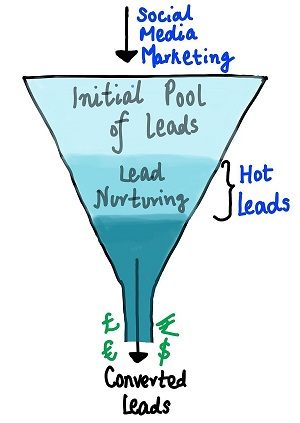


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot.
The model should be able to adjust to if the company's requirement changes in the future. 


In [1]:
# Importing necessary library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To View maximum columns
pd.set_option('display.max_columns', None)

## Reading and Inspecting the data

In [4]:
# Read the given lead file
leads_df = pd.read_csv('Leads.csv')

In [5]:
# Take a look at the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# get shape of Dataframe
leads_df.shape

(9240, 37)

In [7]:
# Lets get numeric column summery
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# get info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data preparation

In [9]:
# Check the count of unique values in each columns of the dataframe
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Lets drop variable having single value as it will not provide any valuable information in analysis

In [10]:
leads_df = leads_df.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
 'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

# Check dropping of single valued variable
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

#### We have seen that the dataframe contains some values as 'Select', these are as good as the missing values

In [11]:
# Lets replace 'Select' with null
leads_df = leads_df.replace('Select', np.nan)

In [12]:
# Lets check for the % missing values.
round((leads_df.isnull().sum()/len(leads_df.index))*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [13]:
# Lets Remove columns with more than 35% of Missing Values
cols=leads_df.columns[round((leads_df.isnull().sum()/len(leads_df))*100)>=35]
leads_df = leads_df.drop(cols, axis=1)

In [14]:
# 'TotalVisits', 'Page Views Per Visit', 'Last Activity' and 'Lead Source' having less than 1.5% as missing values.
# Lets remove those rows.
leads_df = leads_df.dropna(subset = ['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source'], axis=0)

### Check for the duplicates & Missing Value Imputation

In [15]:
# Lets check for the duplicate values in dataframe
duplicate_rows = leads_df.loc[leads_df.duplicated()]
duplicate_rows.shape

(0, 22)

There are no duplicate rows in the dataframe.

In [16]:
# Lets check for the % missing values again.
round((leads_df.isnull().sum()/len(leads_df.index))*100,2).sort_values()

Prospect ID                                       0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
TotalVisits                                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Source                                       0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Last Notab

In [17]:
# Lets check % of different value apearance in 'Country' column
round((leads_df['Country'].value_counts()*100)/(leads_df['Country'].value_counts().sum()), 2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

In [18]:
# Lets delete 'Country' Column as almost 95% values are same
leads_df = leads_df.drop('Country', axis = 1)

In [19]:
# Lets check % of different value apearance in 'What is your current occupation' column
round((leads_df['What is your current occupation'].value_counts()*100)/
      (leads_df['What is your current occupation'].value_counts().sum()), 2)

Unemployed              85.68
Working Professional    10.59
Student                  3.22
Other                    0.23
Housewife                0.14
Businessman              0.13
Name: What is your current occupation, dtype: float64

In [20]:
# Lets impute  "Unavailable" as informations are missing in 'What is your current occupation' Column
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Unavailable')

In [21]:
# Lets check which value apears how many times in 'What matters most to you in choosing a course' column
round((leads_df['What matters most to you in choosing a course'].value_counts()*100)/
      (leads_df['What matters most to you in choosing a course'].value_counts().sum()), 2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [22]:
# Lets delete 'What matters most to you in choosing a course' Column as almost all values are same
leads_df = leads_df.drop('What matters most to you in choosing a course', axis = 1)

In [23]:
# Lets check for the null values in dataframe again
leads_df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now our dataset is free from the null values.

In [24]:
# Lets check for the unique values in columns in dataframe again
leads_df.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [25]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Do Not Call                             9074 non-null   object 
 6   Converted                               9074 non-null   int64  
 7   TotalVisits                             9074 non-null   float64
 8   Total Time Spent on Website             9074 non-null   int64  
 9   Page Views Per Visit                    9074 non-null   float64
 10  Last Activity                           9074 non-null   obje

#### Lets check for duplicates/spelling mistakes in columns with non-numeric discrete values

In [26]:
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [27]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [28]:
# 'Google' & 'google' are same so lets replace one by another
leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')

In [29]:
leads_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
leads_df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [31]:
leads_df['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [32]:
leads_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [33]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5476
Unavailable             2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
leads_df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [35]:
leads_df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [36]:
leads_df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [37]:
leads_df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [38]:
leads_df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [39]:
leads_df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [40]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [41]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


* All duplicates/spelling mistakes have been taken care



#### Cheking for Outliers in numerical continuous columns


In [42]:
num_leads_df = leads_df[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,482.887481,2.370151,3.456028
std,545.256560,2.160871,4.858802
min,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,922.750000,3.200000,5.000000
90%,1373.000000,5.000000,7.000000
95%,1557.000000,6.000000,10.000000
99%,1839.000000,9.000000,17.000000


* From the above distribution it is clearly seen that there are outliers in "Page Views Per Visit" & "TotalVisits" columns. "Total Time Spent on Website" column has no outliers as values are gradually increasing.

* Lets draw boxplot for better visualization.

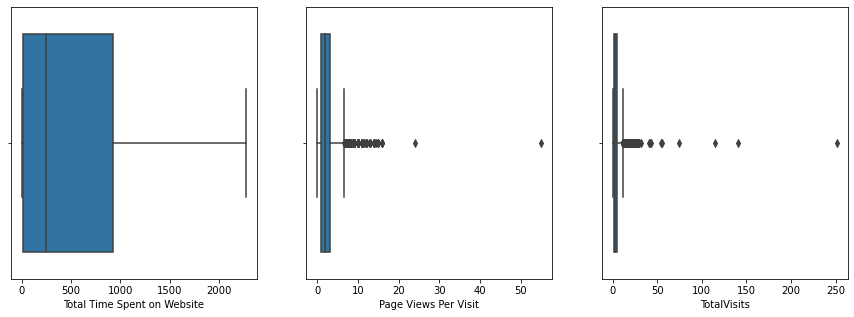

In [43]:
# Lets draw a boxplot
plt.figure(figsize = (15,5))
i = 0
for col in num_leads_df.columns:
    i += 1
    plt.subplot(1,3,i)
    sns.boxplot(num_leads_df[col])
    
plt.show()

From the boxplot also it is clear that there are outliers in "Page Views Per Visit" & "TotalVisits" columns.

#### Lets treat the outlier by taking only upto 99 percentile of data

In [44]:
leads_df = leads_df[leads_df['Page Views Per Visit'] <= np.percentile(leads_df['Page Views Per Visit'],99)]
leads_df =  leads_df[leads_df['TotalVisits'] <= np.percentile(leads_df['TotalVisits'],99)]
leads_df.shape

(8924, 20)

In [45]:
# Lets check the data again
num_leads_df = leads_df[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,8924.000000,8924.00000,8924.000000
mean,479.287875,2.27400,3.153070
std,544.381711,1.89403,2.903138
min,0.000000,0.00000,0.000000
25%,7.000000,1.00000,1.000000
50%,242.000000,2.00000,3.000000
75%,914.000000,3.00000,5.000000
90%,1371.000000,5.00000,7.000000
95%,1553.000000,6.00000,9.000000
99%,1838.540000,8.00000,13.000000


* It is cleary seen that there are no outliers in the dataset after treatment


#### Check categorical variables for data distribution/imbalance


In [46]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [47]:
# lets create a list of categorical variables
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 
            'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 
            'Last Notable Activity']

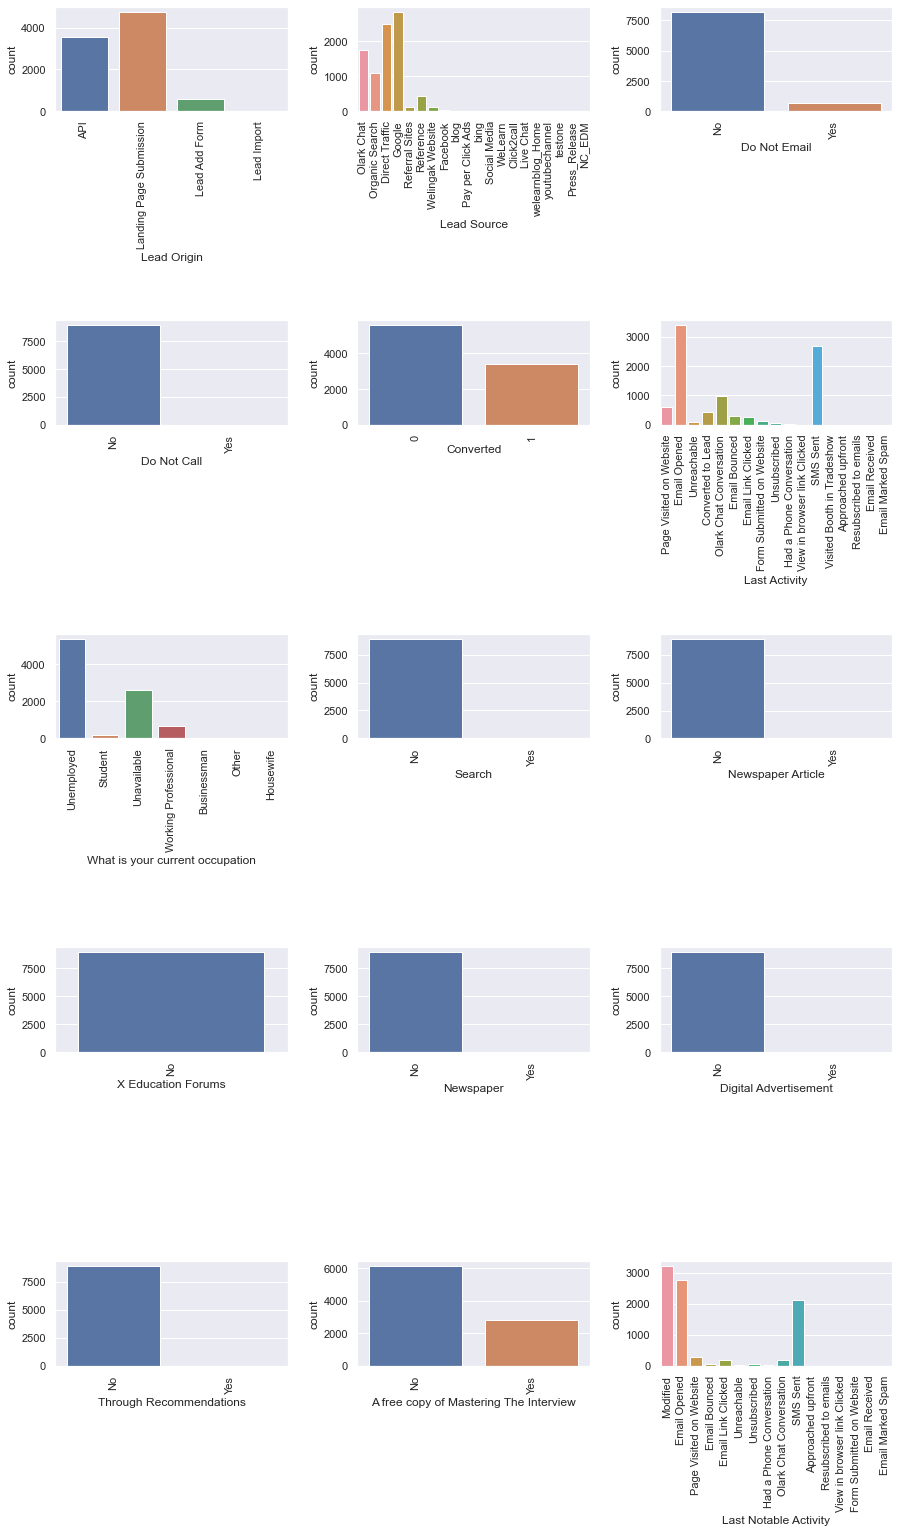

In [48]:
# plotting countplot for categorical variables
plt.figure(figsize=(15,25))
sns.set()
plt.subplots_adjust(wspace=.3,hspace=2)
for i in enumerate(cat_cols):
    plt.subplot(5,3, i[0]+1)
    sns.countplot(i[1],data=leads_df) 
    plt.xticks(rotation=90)
plt.show()

##### Insights:
* We can see that there are many columns which are highly skewed. We will remove these columns as these won't be useful in model building.
*There are cloumns having many categories, We can impute new value 'Other' for values whose occurance are less.

In [49]:
# Dropping of highly skewed columns
leads_df=leads_df.drop(['Do Not Email', 'Do Not Call','Search', 'Newspaper Article','X Education Forums', 
                        'Newspaper', 'Digital Advertisement','Through Recommendations'], axis=1)

#### Lets impute new value 'Other' for values whose occurance are less in columns having many categories(>5)


In [50]:
# create a function for changing categories to 'Other' which occured less times
def cat_change(df, count):
    df1 = df.copy()
    more_cat_dict = dict(df1.value_counts()<count)
    for key in more_cat_dict.keys():
        if more_cat_dict[key]==True:
            df1 = df1.replace(key,'Other')
    return df1

In [51]:
# Call function cat_change for value change
leads_df['Lead Source'] = cat_change(leads_df['Lead Source'], 200)
leads_df['Last Activity'] = cat_change(leads_df['Last Activity'], 150)
leads_df['What is your current occupation'] = cat_change(leads_df['What is your current occupation'], 100)
leads_df['Last Notable Activity'] = cat_change(leads_df['Last Notable Activity'], 150)

## Exploratory Data Analysis (EDA)

#### Univariate Analysis (Categorical)

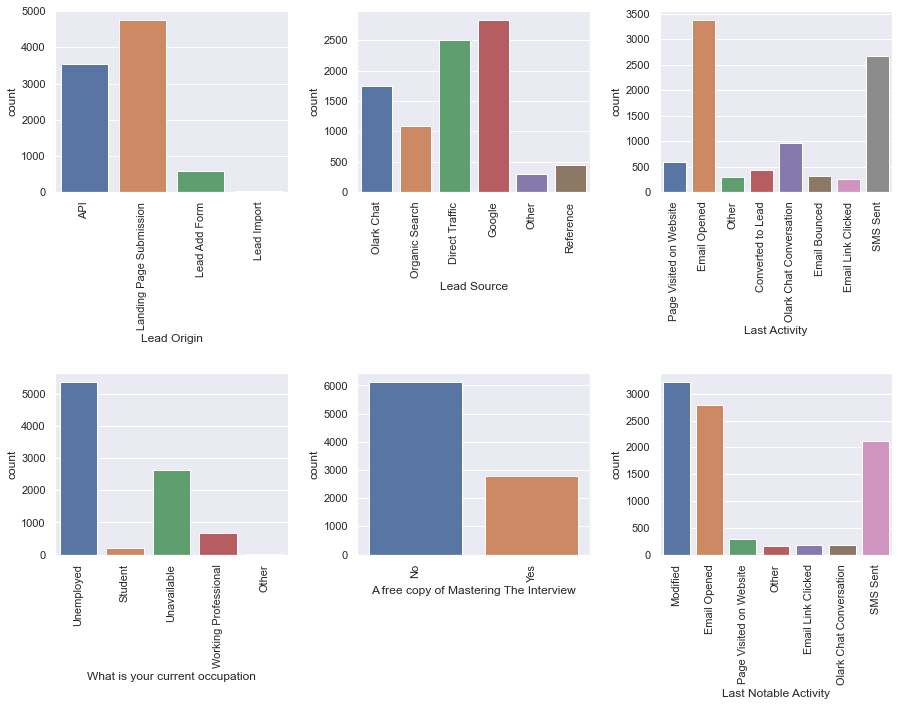

In [52]:
# Lets draw countplot once again to see the changes
cat_cols_new = ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 
                'A free copy of Mastering The Interview', 'Last Notable Activity']
# plotting countplot for categorical variables
plt.figure(figsize=(15,10))
sns.set()
plt.subplots_adjust(wspace=.3,hspace=1)
for i in enumerate(cat_cols_new):
    plt.subplot(2,3, i[0]+1)
    sns.countplot(i[1],data=leads_df) 
    plt.xticks(rotation=90)
plt.show()

#### Insights:
    - API & Landing Page Submission are two major contributor of Lead Origin.
    - Direct Traffic and Google are the two main source of Leads.
    - Email Opened and SMS Sent are the major Last Activity.
    - Most of the lead generated by Unemployed.
    - Majority don't want a free copy of Mastering The Interview.

#### Univariate Analysis(Continuous)

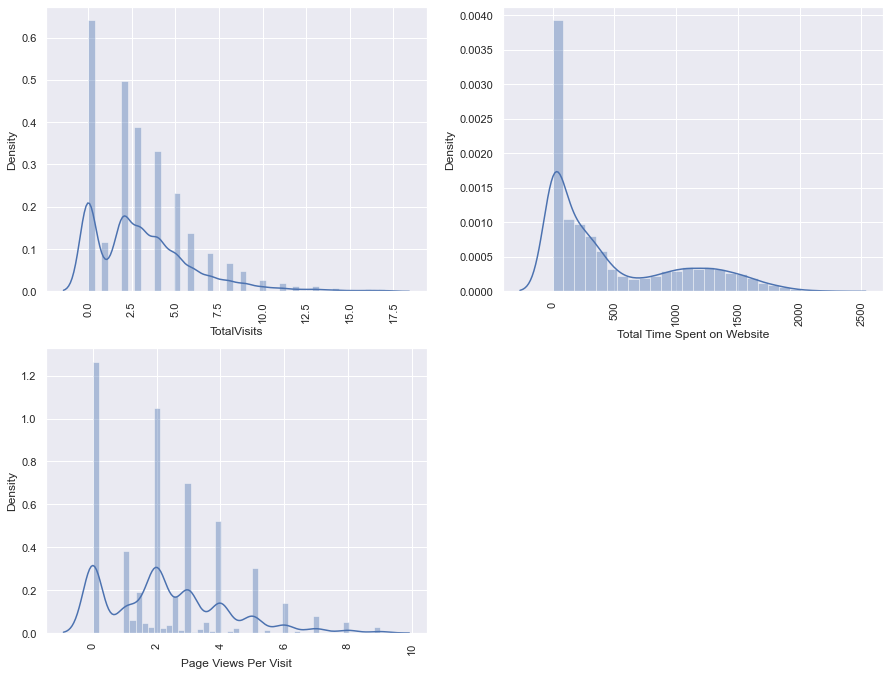

In [53]:
# Lets draw distribution plot for continuous variables
num_col_new = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom=.01)

for i in enumerate(num_col_new):    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(leads_df[i[1]])    
    plt.xticks(rotation=90)

plt.show()

#### Insights:
- None of the continuous variables are normally distributed.
- Outliers presence are not there.
- Totalvisits values are between 0-17, Total Time Spent on Website values are between 0-2500 and Page Views Per Visits values are between 0-10

### Bivariate Analysis

- Bivariate Analysis With respect to target column 'Converted'

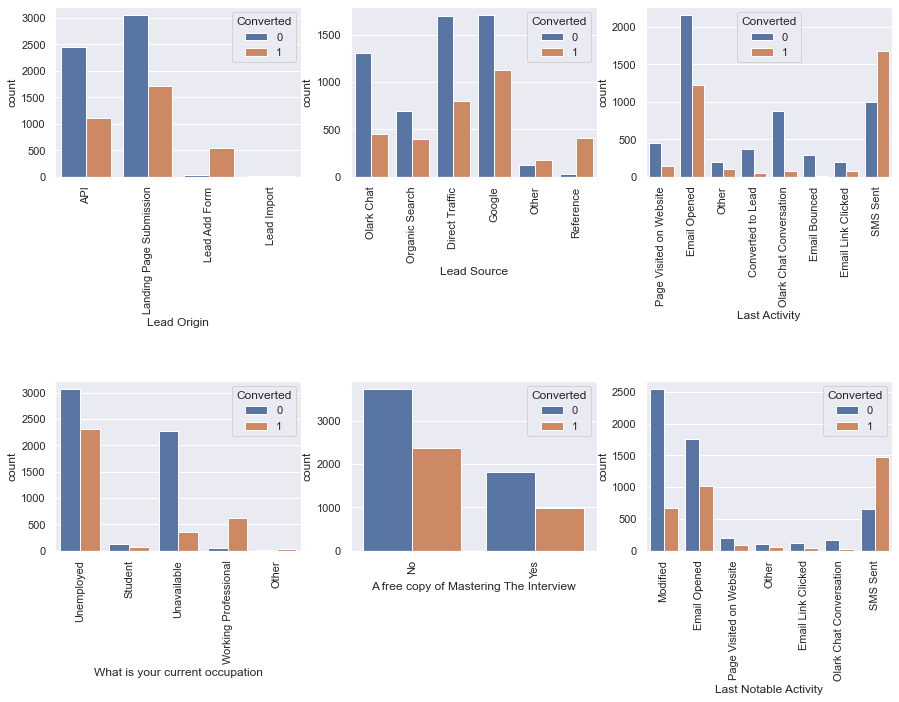

In [54]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=.2,hspace=1.2 )

for i in enumerate(cat_cols_new):
    plt.subplot(2,3, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)

plt.show()

#### Insights:
- Lead Origin : Hot leads are more  in Landing Page Submission, API and Lead Add Form.
- Lead Source: Hot leads are higher in Direct Traffic and Google.
- Last Activity: Hot leads are higher in SMS Sent and EMAIL Opened.
- What is your current occupation: Hot leads are mostly generated by Unemployed and Working Professional.
- A free copy of Mastering The Interview: Hot leads are more with answer No.
- Last Notable Activity: Similar to Last Activity.

## Data Preparation and Features Selection

In [55]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [56]:
# 'Last Activity' and 'Last Notable Activity' are similar columns.
# Lets remove 'Last Notable Activity'
leads_df = leads_df.drop('Last Notable Activity', axis = 1)
# 'Prospect ID' and 'Lead Number' are having all unique values and acting as ID so delete one column 'Prospect ID'
leads_df = leads_df.drop('Prospect ID', axis = 1)
# Lets make 'Lead Number' as index
leads_df=leads_df.set_index('Lead Number')

#### Converting binary variables Yes/No to 1/0

In [57]:
leads_df['A free copy of Mastering The Interview'] = leads_df[
    'A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

### Lets create dummy variables for categorical columns having more than two categories

#### Creating dummy variables for categorical columns by dropping one level.

In [58]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix= 'LeadOrigin')
# Dropping 'LeadOrigin_Lead Import' column
lo1 = lo.drop(['LeadOrigin_Lead Import'], axis = 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lo1], axis=1)
#Drop original 'Lead Origin' column
leads_df = leads_df.drop('Lead Origin', axis=1)

In [59]:
# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leads_df['Lead Source'], prefix= 'LeadSource')
# Dropping 'LeadSource_Other' column
ls1 = ls.drop(['LeadSource_Other'], axis = 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls1], axis=1)
#Drop original 'Lead Source' column
leads_df = leads_df.drop('Lead Source', axis=1)

In [60]:
# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads_df['Last Activity'], prefix= 'LastActivity')
# Dropping 'LastActivity_Other' column
la1 = la.drop(['LastActivity_Other'], axis = 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,la1], axis=1)
#Drop original 'Last Activity' column
leads_df = leads_df.drop('Last Activity', axis=1)

In [61]:
# Creating dummy variables for the variable 'What is your current occupation'
sp = pd.get_dummies(leads_df['What is your current occupation'], prefix= 'What_is_your_current_occupation')
# Dropping 'What_is_your_current_occupation_Other' column
sp1 = sp.drop(['What_is_your_current_occupation_Other'], axis = 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,sp1], axis=1)
#Drop original 'What is your current occupation' column
leads_df = leads_df.drop('What is your current occupation', axis=1)

In [62]:
# Lets look at the head of dataset
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unavailable,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
660727,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
660681,1,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [63]:
# Lets get the dataset info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 660737 to 579533
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8924 non-null   int64  
 1   TotalVisits                                           8924 non-null   float64
 2   Total Time Spent on Website                           8924 non-null   int64  
 3   Page Views Per Visit                                  8924 non-null   float64
 4   A free copy of Mastering The Interview                8924 non-null   int64  
 5   LeadOrigin_API                                        8924 non-null   uint8  
 6   LeadOrigin_Landing Page Submission                    8924 non-null   uint8  
 7   LeadOrigin_Lead Add Form                              8924 non-null   uint8  
 8   LeadSource_Direct Traffic                          

In [64]:
# Lets get the shape of dataset
leads_df.shape

(8924, 24)

## Test - Train Split

In [65]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unavailable,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
660728,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
660727,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
660719,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
660681,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [66]:
# Putting response variable to y
y = leads_df[['Converted']]

y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [68]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unavailable,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
598617,0.176471,0.548856,0.333333,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
602684,0.235294,0.359155,0.444444,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
583729,0.176471,0.496479,0.333333,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
627486,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
599542,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [69]:
### Checking the Conversion Rate
Conversion = (sum(leads_df['Converted'])/len(leads_df['Converted']))*100
Conversion

37.75212909009413

Conversion rate is around 37%

### Looking at Correlations

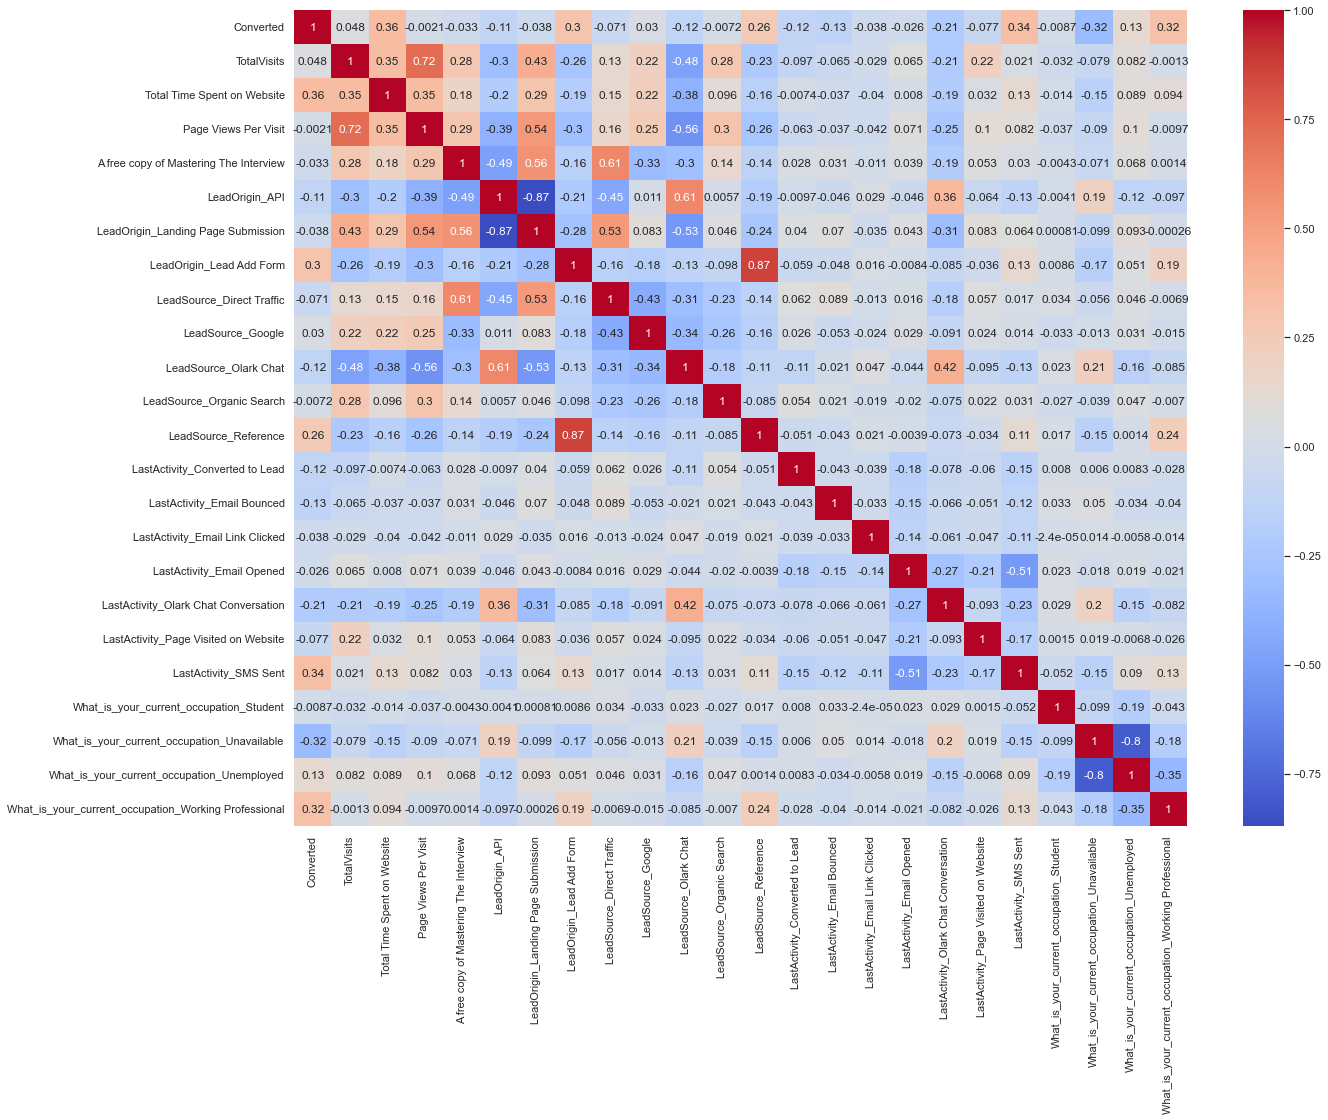

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads_df.corr(),annot = True, cmap = 'coolwarm')
plt.show()

* From the heatmap it is clear that some variables are highly correlated.
* Let RFE to decide wheather to drop columns or not.

### Feature Selection Using RFE

In [71]:
# Initializing LogisticRegression
logreg = LogisticRegression() 
# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Direct Traffic', False, 3),
 ('LeadSource_Google', False, 8),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 7),
 ('LeadSource_Reference', False, 5),
 ('LastActivity_Converted to Lead', True, 1),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', False, 6),
 ('LastActivity_Email Opened', False, 4),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Page Visited on Website', True, 1),
 ('LastActivity_SMS Sent', True, 1),
 ('What_is_your_current_occupation_Student', True, 1),
 ('What_is_your_current_occupation_Unavailable', True, 1),
 ('What_is_your_current_occupation_Unemployed', False, 2),
 ('What_is_your_current_occupation_

In [73]:
# Lets list out RFE selected variables
sel_cols1 = X_train.columns[rfe.support_]
sel_cols1

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unavailable',
       'What_is_your_current_occupation_Working Professional'],
      dtype='object')

In [74]:
# Lets list out RFE rejected variables
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened',
       'What_is_your_current_occupation_Unemployed'],
      dtype='object')

### Building a Logistic Regression using statsmodel

#### Model-1

In [75]:
X_train_sm1 = sm.add_constant(X_train[sel_cols1])
log_mod = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
lm1 = log_mod.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.6
Date:                Tue, 21 Mar 2023   Deviance:                       5095.2
Time:                        00:20:59   Pearson chi2:                 6.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1243      0.491     -2.290      0.022      -2.087      -0.162
TotalVisits                                              2.0655      0.302      6.850      0.000       1.475       2.657
Total Time Spent on Website                              4.5769      0.170     26.899      0.000       4.243       4.910
Page Views Per Visit                                    -1.3365      0.268     -4.982      0.000      -1.862      -0.811
LeadOrigin_API                                          -0.7340      0.505     -1.453      0.146      -1.724       0.256
LeadOrigin_Landing Page Submission                      -1.0308      0.504     -2.045      0.041      -2.019      -0.043
LeadOrigin_Lead Add Form                                 2.8853      0.531      5.438      0.000       1.845       3.925
LeadSource_Olark Chat                                    1.1376      0.140      8.125      0.000       0.863       1.412
LastActivity_Converted to Lead                          -1.2472      0.226     -5.521      0.000      -1.690      -0.804
LastActivity_Email Bounced                              -2.1592      0.374     -5.773      0.000      -2.892      -1.426
LastActivity_Olark Chat Conversation                    -1.5351      0.170     -9.020      0.000      -1.869      -1.202
LastActivity_Page Visited on Website                    -0.7273      0.155     -4.678      0.000      -1.032      -0.423
LastActivity_SMS Sent                                    1.2011      0.078     15.402      0.000       1.048       1.354
What_is_your_current_occupation_Student                 -0.0379      0.227     -0.167      0.868      -0.483       0.407
What_is_your_current_occupation_Unavailable             -1.2280      0.089    -13.847      0.000      -1.402      -1.054
What_is_your_current_occupation_Working Professional     2.4928      0.188     13.262      0.000       2.124       2.861
========================================================================================================================
"""

In [76]:
# Function for vif calculations
def vifcal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [77]:
# Calculate the VIFs for variables
vifcal(X_train[sel_cols1])

,Features,VIF
2,Page Views Per Visit,6.58
4,LeadOrigin_Landing Page Submission,6.37
3,LeadOrigin_API,5.35
0,TotalVisits,5.09
6,LeadSource_Olark Chat,3.14
1,Total Time Spent on Website,2.36
11,LastActivity_SMS Sent,1.73
13,What_is_your_current_occupation_Unavailable,1.64
9,LastActivity_Olark Chat Conversation,1.50
10,LastActivity_Page Visited on Website,1.20


* 'What_is_your_current_occupation_Student' is insignificant because it has high p-value (>0.05) so it is to be dropped

In [78]:
sel_cols2 = sel_cols1.drop('What_is_your_current_occupation_Student', 1)
sel_cols2

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Unavailable',
       'What_is_your_current_occupation_Working Professional'],
      dtype='object')

#### Model-2

In [79]:
X_train_sm2 = sm.add_constant(X_train[sel_cols2])
log_mod = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
lm2 = log_mod.fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.6
Date:                Tue, 21 Mar 2023   Deviance:                       5095.2
Time:                        00:20:59   Pearson chi2:                 6.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1246      0.491     -2.291      0.022      -2.087      -0.162
TotalVisits                                              2.0669      0.301      6.857      0.000       1.476       2.658
Total Time Spent on Website                              4.5768      0.170     26.899      0.000       4.243       4.910
Page Views Per Visit                                    -1.3362      0.268     -4.981      0.000      -1.862      -0.810
LeadOrigin_API                                          -0.7352      0.505     -1.456      0.145      -1.725       0.254
LeadOrigin_Landing Page Submission                      -1.0323      0.504     -2.049      0.040      -2.020      -0.045
LeadOrigin_Lead Add Form                                 2.8835      0.531      5.435      0.000       1.844       3.923
LeadSource_Olark Chat                                    1.1372      0.140      8.124      0.000       0.863       1.412
LastActivity_Converted to Lead                          -1.2471      0.226     -5.521      0.000      -1.690      -0.804
LastActivity_Email Bounced                              -2.1609      0.374     -5.780      0.000      -2.894      -1.428
LastActivity_Olark Chat Conversation                    -1.5360      0.170     -9.030      0.000      -1.869      -1.203
LastActivity_Page Visited on Website                    -0.7273      0.155     -4.678      0.000      -1.032      -0.423
LastActivity_SMS Sent                                    1.2018      0.078     15.429      0.000       1.049       1.354
What_is_your_current_occupation_Unavailable             -1.2267      0.088    -13.885      0.000      -1.400      -1.054
What_is_your_current_occupation_Working Professional     2.4941      0.188     13.281      0.000       2.126       2.862
========================================================================================================================
"""

In [80]:
# Calculate the VIFs for variables
vifcal(X_train[sel_cols2])

,Features,VIF
2,Page Views Per Visit,6.57
4,LeadOrigin_Landing Page Submission,6.30
3,LeadOrigin_API,5.31
0,TotalVisits,5.08
6,LeadSource_Olark Chat,3.14
1,Total Time Spent on Website,2.36
11,LastActivity_SMS Sent,1.72
12,What_is_your_current_occupation_Unavailable,1.61
9,LastActivity_Olark Chat Conversation,1.50
10,LastActivity_Page Visited on Website,1.20


* 'LeadOrigin_API' is insignificant because it has high p-value (>0.05) so it is to be dropped

In [81]:
sel_cols3 = sel_cols2.drop('LeadOrigin_API', 1)
sel_cols3

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Unavailable',
       'What_is_your_current_occupation_Working Professional'],
      dtype='object')

#### Model-3

In [82]:
X_train_sm3 = sm.add_constant(X_train[sel_cols3])
log_mod = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
lm3 = log_mod.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.6
Date:                Tue, 21 Mar 2023   Deviance:                       5097.2
Time:                        00:20:59   Pearson chi2:                 6.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4009
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8222      0.123    -14.821      0.000      -2.063      -1.581
TotalVisits                                              2.0434      0.301      6.795      0.000       1.454       2.633
Total Time Spent on Website                              4.5564      0.169     26.907      0.000       4.225       4.888
Page Views Per Visit                                    -1.3666      0.267     -5.110      0.000      -1.891      -0.842
LeadOrigin_Landing Page Submission                      -0.3093      0.092     -3.380      0.001      -0.489      -0.130
LeadOrigin_Lead Add Form                                 3.5824      0.233     15.354      0.000       3.125       4.040
LeadSource_Olark Chat                                    1.1034      0.138      8.007      0.000       0.833       1.374
LastActivity_Converted to Lead                          -1.2599      0.226     -5.586      0.000      -1.702      -0.818
LastActivity_Email Bounced                              -2.1675      0.374     -5.800      0.000      -2.900      -1.435
LastActivity_Olark Chat Conversation                    -1.5408      0.170     -9.064      0.000      -1.874      -1.208
LastActivity_Page Visited on Website                    -0.7281      0.155     -4.689      0.000      -1.033      -0.424
LastActivity_SMS Sent                                    1.2000      0.078     15.412      0.000       1.047       1.353
What_is_your_current_occupation_Unavailable             -1.2298      0.088    -13.931      0.000      -1.403      -1.057
What_is_your_current_occupation_Working Professional     2.4943      0.188     13.282      0.000       2.126       2.862
========================================================================================================================
"""

In [83]:
# Calculate the VIFs for variables
vifcal(X_train[sel_cols3])

,Features,VIF
2,Page Views Per Visit,5.74
0,TotalVisits,4.84
3,LeadOrigin_Landing Page Submission,3.09
1,Total Time Spent on Website,2.11
10,LastActivity_SMS Sent,1.63
5,LeadSource_Olark Chat,1.58
11,What_is_your_current_occupation_Unavailable,1.51
8,LastActivity_Olark Chat Conversation,1.44
9,LastActivity_Page Visited on Website,1.18
12,What_is_your_current_occupation_Working Profes...,1.16


* 'Page Views Per Visit' is insignificant because it has high VIF (>5) so it is to be dropped

In [84]:
sel_cols4 = sel_cols3.drop('Page Views Per Visit', 1)
sel_cols4

Index(['TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Unavailable',
       'What_is_your_current_occupation_Working Professional'],
      dtype='object')

#### Model-4

In [85]:
X_train_sm4 = sm.add_constant(X_train[sel_cols4])
log_mod = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
lm4 = log_mod.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.9
Date:                Tue, 21 Mar 2023   Deviance:                       5123.8
Time:                        00:20:59   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3983
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0421      0.116    -17.614      0.000      -2.269      -1.815
TotalVisits                                              1.2853      0.260      4.938      0.000       0.775       1.795
Total Time Spent on Website                              4.5499      0.169     26.919      0.000       4.219       4.881
LeadOrigin_Landing Page Submission                      -0.3875      0.090     -4.317      0.000      -0.563      -0.212
LeadOrigin_Lead Add Form                                 3.8011      0.230     16.551      0.000       3.351       4.251
LeadSource_Olark Chat                                    1.3124      0.132      9.925      0.000       1.053       1.572
LastActivity_Converted to Lead                          -1.1907      0.226     -5.276      0.000      -1.633      -0.748
LastActivity_Email Bounced                              -2.0968      0.372     -5.637      0.000      -2.826      -1.368
LastActivity_Olark Chat Conversation                    -1.5167      0.169     -8.985      0.000      -1.848      -1.186
LastActivity_Page Visited on Website                    -0.6600      0.153     -4.310      0.000      -0.960      -0.360
LastActivity_SMS Sent                                    1.1769      0.077     15.192      0.000       1.025       1.329
What_is_your_current_occupation_Unavailable             -1.2167      0.088    -13.848      0.000      -1.389      -1.044
What_is_your_current_occupation_Working Professional     2.4972      0.187     13.336      0.000       2.130       2.864
========================================================================================================================
"""

In [86]:
# Calculate the VIFs for variables
vifcal(X_train[sel_cols4])

,Features,VIF
0,TotalVisits,2.84
2,LeadOrigin_Landing Page Submission,2.65
1,Total Time Spent on Website,2.09
9,LastActivity_SMS Sent,1.61
4,LeadSource_Olark Chat,1.57
10,What_is_your_current_occupation_Unavailable,1.50
7,LastActivity_Olark Chat Conversation,1.43
8,LastActivity_Page Visited on Website,1.18
11,What_is_your_current_occupation_Working Profes...,1.16
3,LeadOrigin_Lead Add Form,1.14


#### In Model-4 all the p-values are bellow 0.05 and VIFs are bellow 5
#### Lets consider lm4  as Final Model

In [87]:
# Getting the predicted values on the train set
y_train_pred = lm4.predict(X_train_sm4).values.reshape(-1)
y_train_pred[:10]

array([0.57309317, 0.66459517, 0.927803  , 0.03037883, 0.12494441,
       0.35556412, 0.89837713, 0.02648971, 0.36444424, 0.03919535])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [88]:
y_train_pred_final = pd.DataFrame({'Lead Number':y_train.index, 'Converted':y_train['Converted'],
                                   'Converted_Prob':y_train_pred})
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,598617,1,0.573093
1,602684,1,0.664595
2,583729,1,0.927803
3,627486,0,0.030379
4,599542,0,0.124944


In [89]:
# let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Converted_pred
0,598617,1,0.573093,1
1,602684,1,0.664595,1
2,583729,1,0.927803,1
3,627486,0,0.030379,0
4,599542,0,0.124944,0


In [90]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])
confusion

array([[3434,  437],
       [ 714, 1661]], dtype=int64)

In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred']))

0.8157220621197566


### Metrics beyond simply accuracy

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the accuracy of our logistic regression model
(TP+TN)/float(TP+TN+FP+FN)

0.8157220621197566

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6993684210526315

#### We are getting low sensitivity while taking cutoff 0.5

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.8871092740893826

In [96]:
# Calculate false postive rate - predicting Converted when actually didn't Convert
FP/ float(TN+FP)

0.11289072591061741

In [97]:
# positive predictive value 
TP / float(TP+FP)

0.7917063870352717

In [98]:
# Negative predictive value
TN / float(TN+ FN)

0.8278688524590164

### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( 
    y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

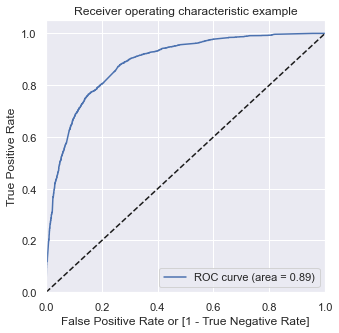

In [101]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

* Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,598617,1,0.573093,1,1,1,1,1,1,1,0,0,0,0
1,602684,1,0.664595,1,1,1,1,1,1,1,1,0,0,0
2,583729,1,0.927803,1,1,1,1,1,1,1,1,1,1,1
3,627486,0,0.030379,0,1,0,0,0,0,0,0,0,0,0
4,599542,0,0.124944,0,1,1,0,0,0,0,0,0,0,0


In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.621998  0.976421  0.404547
0.2   0.2  0.755203  0.919158  0.654611
0.3   0.3  0.789465  0.879579  0.734177
0.4   0.4  0.813961  0.770526  0.840610
0.5   0.5  0.815722  0.699368  0.887109
0.6   0.6  0.806436  0.628632  0.915526
0.7   0.7  0.781300  0.511579  0.946784
0.8   0.8  0.759846  0.421053  0.967709
0.9   0.9  0.706532  0.250526  0.986308


<Figure size 1440x1080 with 0 Axes>

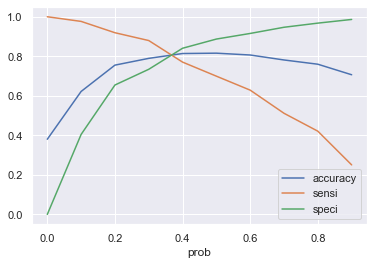

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the curve above lets take 0.32 as optimum final cutoff.

In [105]:
# let's take 0.32 as Cutoff
y_train_pred_final['final_predicted']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.32 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,598617,1,0.573093,1,1,1,1,1,1,1,0,0,0,0,1
1,602684,1,0.664595,1,1,1,1,1,1,1,1,0,0,0,1
2,583729,1,0.927803,1,1,1,1,1,1,1,1,1,1,1,1
3,627486,0,0.030379,0,1,0,0,0,0,0,0,0,0,0,0
4,599542,0,0.124944,0,1,1,0,0,0,0,0,0,0,0,0


In [106]:
# Let's take a look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2917,  954],
       [ 346, 2029]], dtype=int64)

### Precision and Recall

In [107]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6801877304726786

In [108]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8543157894736843

<b><font color = green size =3>The CEO of X-Education wants lead conversion rate more than 80% hence this model will be suitable for them.

### Precision and recall tradeoff

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

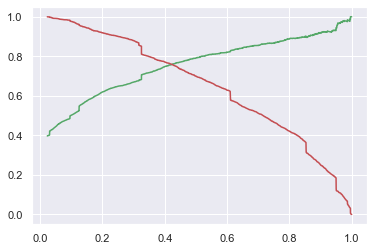

In [110]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

* From the above curve we can see that precision & recall intersects at 0.41
* From the graph it is also clear that for having Recall >= 80% we have to keep cutoff <=0.32

### Making predictions on the test set

In [111]:
# Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unavailable,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
591317,0.117647,0.713468,0.222222,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
609892,0.235294,0.390405,0.444444,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
636774,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
617905,0.117647,0.102113,0.222222,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
649259,0.882353,0.139525,0.555556,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [112]:
#Adding constant to test dataset
X_test_sm = sm.add_constant(X_test[sel_cols4])

In [113]:
# Getting the predicted values on the test set
y_test_pred = lm4.predict(X_test_sm).values.reshape(-1)
y_test_pred[:10]

array([0.72469048, 0.41317697, 0.94958963, 0.34595112, 0.34058741,
       0.68223215, 0.04740384, 0.20806673, 0.03037883, 0.76041278])

In [114]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities on test dataset
y_test_pred_final = pd.DataFrame({'Lead Number':y_test.index, 'Converted':y_test['Converted'],
                                   'Converted_Prob':y_test_pred})
y_test_pred_final.reset_index(drop=True, inplace=True)
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,591317,0,0.724690
1,609892,1,0.413177
2,636774,1,0.949590
3,617905,0,0.345951
4,649259,0,0.340587


In [115]:
# let's take 0.32 as Cutoff as we did with train dataset
y_test_pred_final['test_final_pred'] = y_test_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.32 else 0)
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,test_final_pred
0,591317,0,0.724690,1
1,609892,1,0.413177,1
2,636774,1,0.949590,1
3,617905,0,0.345951,1
4,649259,0,0.340587,1


In [116]:
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,test_final_pred
0,591317,0,0.724690,1
1,609892,1,0.413177,1
2,636774,1,0.949590,1
3,617905,0,0.345951,1
4,649259,0,0.340587,1


In [120]:
# Let's take a look at the confusion matrix for test data
test_confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['test_final_pred'])
test_confusion

array([[1256,  428],
       [ 151,  843]], dtype=int64)

In [121]:
test_TP = test_confusion[1,1] # true positive 
test_TN = test_confusion[0,0] # true negatives
test_FP = test_confusion[0,1] # false positives
test_FN = test_confusion[1,0] # false negatives

In [122]:
# Let's see the accuracy of our logistic regression model on test dataset
(test_TP+test_TN)/float(test_TP+test_TN+test_FP+test_FN)

0.7837938760268858

In [123]:
# Let's see the sensitivity of our logistic regression model on test dataset
test_TP / float(test_TP+test_FN)

0.8480885311871227

In [124]:
# Let us calculate specificity on test dataset
test_TN / float(test_TN+test_FP)

0.7458432304038005

### Precision and Recall on test dataset

In [117]:
# Finding the Precision Score
precision_score(y_test_pred_final.Converted, y_test_pred_final.test_final_pred)

0.6632572777340676

In [118]:
# Finding the Recall Score
recall_score(y_test_pred_final.Converted, y_test_pred_final.test_final_pred)

0.8480885311871227

<b><font size=3>Inference:</font></b><br>
On running the model on the Test Dataset these are the figures we obtain:
<ul>
<li>Accuracy : 78.37%</li>
<li>Sensitivity/Recall :84.80%</li>
<li>Specificity : 74.58%</li>

<b><font color = green size =3>The prediction by model-4 (lm4) for train & test data is almost similar, hence we can adopt this model.

### Conclusion :-
- We have noted the variables that are most important for being the potential buyers are:
####    - Total Time Spent on Website.
####    - When 'Lead Origin' is:
        - Lead Add Form
####    - When 'What is your current occupation' is:
        - Working Professional
####    - When 'Lead Source' is:
        - Olark Chat
####    - TotalVisits.
####    - When 'Last Activity' is:
        - SMS Sent